In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, asc


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
Base.prepare(autoload_with=engine)

# Use the Base class to reflect the database tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
session.query(Measurement.date, Measurement.prcp).all()

[('2010-01-01', 2.0),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 1.5),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.3),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.3),
 ('2010-01-25', 0.0),
 ('2010-01-26', 1.0),
 ('2010-01-27', 3.0),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.8),
 ('2010-02-01', 0.3),
 ('2010-02-03', None),
 ('2010-02-04', 0.3),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.5),
 ('2010-02-13', 0.3),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0.8),
 ('201

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(desc(Measurement.date)).first()

('2017-08-23',)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results_df_sorted' is your DataFrame
results_df_sorted = results_df.sort_values('Date').dropna()

# Drop rows where 'Precipitation' is 0
results_df_sorted = results_df_sorted[results_df_sorted['Precipitation'] != 0]

# Convert 'Date' column to datetime type
results_df_sorted['Date'] = pd.to_datetime(results_df_sorted['Date'])

# Create a bar chart
ax = results_df_sorted.plot(x='Date', y='Precipitation', kind='bar', label='Precipitation', width=4)

plt.xlabel('Date')
plt.ylabel('mm')
plt.ylim(0, 175)
plt.yticks(range(0, 176, 25))
plt.legend(bbox_to_anchor=(0.65, 1.02))

# Set x-axis ticks to specific dates
specific_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
date_positions = [results_df_sorted.index[results_df_sorted['Date'] == pd.to_datetime(date)].tolist()[0] for date in specific_dates]
plt.xticks(date_positions, specific_dates, rotation=45)

plt.tight_layout()
plt.show()


NameError: name 'results_df' is not defined

In [12]:
last_day = session.query(Measurement.date).order_by(desc(Measurement.date)).first()[0]
last_day = dt.datetime.strptime(last_day, '%Y-%m-%d').date()
last_day

datetime.date(2017, 8, 23)

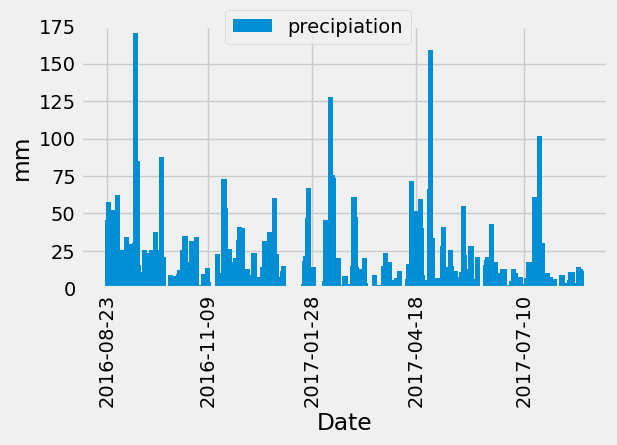

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
last_day = session.query(Measurement.date).order_by(desc(Measurement.date)).first()[0]
last_day = dt.datetime.strptime(last_day, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
one_year_ago = last_day - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results, columns=['Date' , 'Precipitation'])

# Sort the dataframe by date
results_df_sorted = results_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(results_df_sorted['Date'], results_df_sorted['Precipitation'], label='precipiation', width=4)
plt.xlabel('Date')
plt.ylabel('mm')
plt.ylim(0, 175)
plt.yticks(range(0, 176, 25))
plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.1))
specific_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(specific_dates, rotation=90)
plt.tight_layout()

plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = pd.DataFrame(results_df_sorted['Precipitation'].describe())
summary_statistics

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
stateion_number = session.query(Measurement.station).distinct().count()
stateion_number

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Answer the following question: which station id has the greatest number of observations?
print("Station ID 'USC00519281' has the greatest number of observation")

Station ID 'USC00519281' has the greatest number of observation


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
lowest_temp

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
highest_temp

average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
average_temp

print(f'{lowest_temp} {highest_temp} {average_temp}')

[(12.2,)] [(29.4,)] [(22.03582251082252,)]


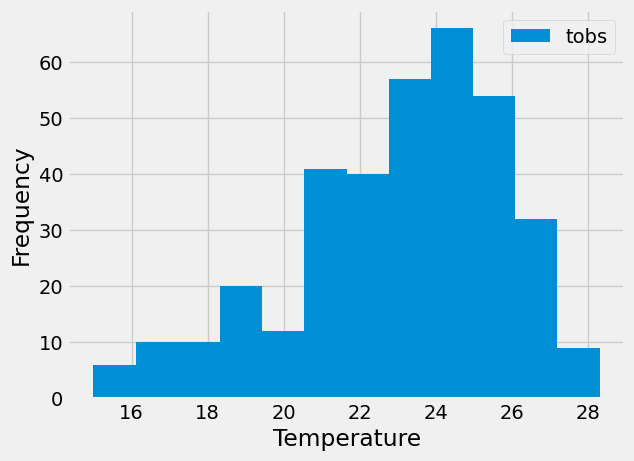

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_id = 'USC00519281'

most_recent_date = session.query(Measurement.date).\
    filter(Measurement.station == most_active_station_id).\
    order_by(desc(Measurement.date)).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d').date()

twelve_month_ago = most_recent_date - dt.timedelta(days=365)
twelve_month_ago

temperature_observation = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= twelve_month_ago).all()

temperature_observation

temperature_observation_df = pd.DataFrame(temperature_observation)

temperature_observation_df

plt.hist(temperature_observation_df['tobs'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()
